In [2]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

import io
dfGW = pd.read_csv(io.BytesIO(uploaded['BostonHousing.csv']), index_col = 0)
dfGW.describe(include = 'all')


Saving BostonHousing.csv to BostonHousing (1).csv


,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [3]:
dfGW = dfGW.drop("MEDV", axis='columns')
dfGW.describe(include = 'all')

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,0.166008
std,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,0.372456
min,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,0.000000
25%,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,0.000000
50%,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,0.000000
75%,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,0.000000
max,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,1.000000


In [6]:
from sklearn.model_selection import train_test_split


In [10]:
dfGW.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CAT. MEDV
CRIM,,,,,,,,,,,,
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,0
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,1
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,1
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,1


In [11]:
y =dfGW['CAT. MEDV']
X =dfGW.drop('CAT. MEDV',axis=1)

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfGW = RandomForestClassifier(random_state=0) #n_estimator = 100(default)

rfGW.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [14]:
rfGW.score(X_val,y_val)

0.9736842105263158

In [15]:
X.shape

(506, 11)

In [16]:
from sklearn.model_selection import GridSearchCV # parameter tuning
import numpy as np

param = {
    'n_estimators': [50,100], #number of trees
    'max_features': range(1,17) #number of mtrees
}

rfgw2 = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=rfgw2,
                           param_grid=param, n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_features': range(1, 17),
                         'n_estimators': [50, 100]})

In [17]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 100}

In [18]:
grid_search.best_score_

0.974486921529175

In [19]:
grid_search.score(X_val,y_val)

0.9736842105263158

In [21]:
final_model = grid_search.best_estimator_

# feature importance

feature_imp = pd.Series(final_model.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

feature_imp

RM         0.403638
LSTAT      0.241573
INDUS      0.091480
PTRATIO    0.079843
TAX        0.042676
DIS        0.038646
AGE        0.032485
NOX        0.026193
ZN         0.024317
RAD        0.015460
CHAS       0.003689
dtype: float64

In [22]:
final_model.feature_importances_

array([0.02431671, 0.09148005, 0.00368922, 0.02619332, 0.40363784,
       0.03248536, 0.03864572, 0.01546037, 0.04267615, 0.07984263,
       0.24157263])

In [25]:
from sklearn.metrics import confusion_matrix

prediction = rfGW.predict(X_val)

confusion_matrix(y_val, prediction)

array([[129,   2],
       [  2,  19]])

In [26]:
rfGW.score(X_val,y_val)

0.9736842105263158

In [27]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

0.9736842105263158

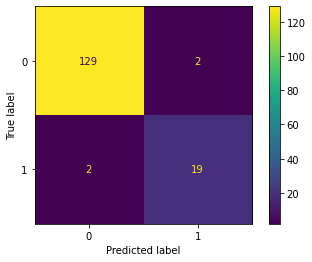

In [34]:
cm = confusion_matrix(y_val,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

accuracy_score(y_val,prediction)

In [35]:
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn import svm

linearSVM = svm.SVC(kernel='linear')
linearSVM.fit(X_train,y_train)


SVC(kernel='linear')

In [37]:
linearSVM.score(X_val,y_val)

0.9605263157894737

In [38]:
radialSVM = svm.SVC(kernel='rbf')

In [39]:
radialSVM.fit(X_train,y_train)
radialSVM.score(X_val,y_val)

0.8618421052631579

In [40]:
param = { 
    'C':[0.01, 0.1, 1, 10, 100],
    'gamma': [0.1, 0.25, 0.5, 0.75, 1],
    'kernel': ['rbf','linear']
}

In [41]:
from sklearn.model_selection import GridSearchCV

SVM=svm.SVC()
grid=GridSearchCV(estimator=SVM,
                  param_grid=param,
                  verbose=3, cv=10)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 2/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 3/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 4/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 5/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 6/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 7/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 8/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 9/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 10/10] END ...C=0.01, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 1/10] END .C=0.01, gamma=0.1, kernel=linear;, score=0.889 total time=   0.0s
[CV 2/10] END .C=0.01, gamma=0.1, kernel=linea

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.1, 0.25, 0.5, 0.75, 1],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [42]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [43]:
grid.score(X_val,y_val)

0.9605263157894737

In [44]:
prediction = linearSVM.predict(X_val)

confusion_matrix(y_val, prediction)

array([[128,   3],
       [  3,  18]])

In [45]:
accuracy_score(y_val,prediction)

0.9605263157894737